# Redes bayesianas para la inferencia en vida en otros planetas

Vamos a poner en práctica lo que hemos aprendido hasta el momento sobre **redes bayesianas**.

Sabemos que esta herramienta nos es útil para sacar conclusiones a partir de unos datos, aprendiendo sobre las probabilidades de unos hechos determinados y, por tanto, pudiendo hacer inferencia sobre otros hechos.

Pues bien, sabido esto, pongamos a prueba una red bayesiana.
En este caso, se nos presenta un problema/caso en el que se nos pide que creemos una red bayesiana para determinar qué probabilidades se podrían dar de que en un planeta con unas características específicas se den otras características, por ejemplo la capacidad de albergar vida.

Para ello usaremos un dataset que se compone de las siguientes variables:

- **Radio:** (metros) - variable real
- **Masa:** (kilogramos) - variable real
- **Gravedad:** (relativa respecto a la terrestre) - variable real
- **Atmósfera:** variable binaria
- **Oxígeno:** variable binaria
- **Temperatura promedio:** (grados centígrados) - variable real
- **Existencia de agua:** variables binaria
- **Periodo de rotación:** (horas) - variable real
- **Vida:** variable binaria

## Dataset

Vistazo general del dataset con el que vamos a tratar.

In [1]:
import bnlearn as bn
import pandas as pd

# Mostramos el dataset

df = pd.read_excel("exoplanets.xls")
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,11473000.0,3.478097e+25,1.80,YES,YES,35.8,YES,50.5,NO
1,10440000.0,2.620465e+25,1.64,NO,NO,34.5,NO,30.5,NO
2,12520000.0,4.518792e+25,1.96,YES,YES,42.1,YES,12.3,YES
3,11727000.0,3.714528e+25,1.84,YES,YES,39.0,NO,24.5,NO
4,7285000.0,8.903243e+24,1.14,NO,NO,9.3,NO,32.7,NO
...,...,...,...,...,...,...,...,...,...
9995,10206000.0,2.447372e+25,1.60,NO,NO,42.1,NO,38.0,NO
9996,8706000.0,1.519392e+25,1.36,YES,YES,73.8,NO,24.9,NO
9997,2592000.0,4.008417e+23,0.41,NO,NO,91.5,NO,50.1,NO
9998,9051000.0,1.707633e+25,1.42,NO,NO,91.2,NO,49.3,NO


## Transformación de las variables numéricas

Evidentemente, la red bayesiana es incapaz de clasificar con valores numéricos continuos. Bueno, en verdad es capaz, pero no vale para absolutamente nada, principalmente por el tiempo de ejecución que ello conllevaría ,con lo cual no valdría la pena.

Por ello, vamos a **categorizar esas variables numéricas a categóricas**, haciendo que el dataset sea más rico en información y mejore su tiempo de ejecución.

Para ello, en cada celda mostraremos un histograma de una variable numérica antes de ser categorizada para ver qué nº de grupos valdrá más la pena crear, y en base a ello ya categorizamos.

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,GRANDE,3.478097e+25,1.80,YES,YES,35.8,YES,50.5,NO
1,GRANDE,2.620465e+25,1.64,NO,NO,34.5,NO,30.5,NO
2,GRANDE,4.518792e+25,1.96,YES,YES,42.1,YES,12.3,YES
3,GRANDE,3.714528e+25,1.84,YES,YES,39.0,NO,24.5,NO
4,PEQUEÑO,8.903243e+24,1.14,NO,NO,9.3,NO,32.7,NO
...,...,...,...,...,...,...,...,...,...
9995,MEDIANO,2.447372e+25,1.60,NO,NO,42.1,NO,38.0,NO
9996,MEDIANO,1.519392e+25,1.36,YES,YES,73.8,NO,24.9,NO
9997,PEQUEÑO,4.008417e+23,0.41,NO,NO,91.5,NO,50.1,NO
9998,MEDIANO,1.707633e+25,1.42,NO,NO,91.2,NO,49.3,NO


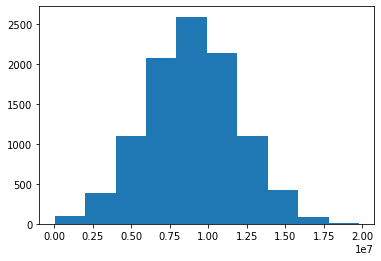

In [2]:
import matplotlib.pyplot as plt

plt.hist(df["radius (m)"]) 
# df["radius (m)"].quantile([0.33, 0.5, 0.66])
df["radius (m)"] = pd.qcut(df["radius (m)"], 3, labels = ["PEQUEÑO", "MEDIANO", "GRANDE"])
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,GRANDE,PESADO,1.80,YES,YES,35.8,YES,50.5,NO
1,GRANDE,PESADO,1.64,NO,NO,34.5,NO,30.5,NO
2,GRANDE,PESADO,1.96,YES,YES,42.1,YES,12.3,YES
3,GRANDE,PESADO,1.84,YES,YES,39.0,NO,24.5,NO
4,PEQUEÑO,LIGERO,1.14,NO,NO,9.3,NO,32.7,NO
...,...,...,...,...,...,...,...,...,...
9995,MEDIANO,PESO MEDIO,1.60,NO,NO,42.1,NO,38.0,NO
9996,MEDIANO,PESO MEDIO,1.36,YES,YES,73.8,NO,24.9,NO
9997,PEQUEÑO,LIGERO,0.41,NO,NO,91.5,NO,50.1,NO
9998,MEDIANO,PESO MEDIO,1.42,NO,NO,91.2,NO,49.3,NO


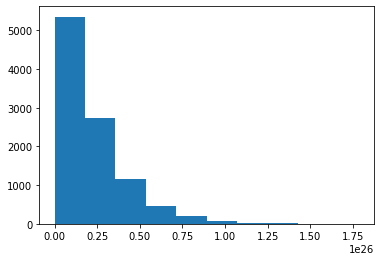

In [3]:
plt.hist(df["mass (kg)"])
# df["mass (kg)"].quantile([0.33, 0.5, 0.66])
df["mass (kg)"] = pd.qcut(df["mass (kg)"], 3, labels = ["LIGERO", "PESO MEDIO", "PESADO"])
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,GRANDE,PESADO,+,YES,YES,35.8,YES,50.5,NO
1,GRANDE,PESADO,+,NO,NO,34.5,NO,30.5,NO
2,GRANDE,PESADO,+,YES,YES,42.1,YES,12.3,YES
3,GRANDE,PESADO,+,YES,YES,39.0,NO,24.5,NO
4,PEQUEÑO,LIGERO,-,NO,NO,9.3,NO,32.7,NO
...,...,...,...,...,...,...,...,...,...
9995,MEDIANO,PESO MEDIO,X̅,NO,NO,42.1,NO,38.0,NO
9996,MEDIANO,PESO MEDIO,X̅,YES,YES,73.8,NO,24.9,NO
9997,PEQUEÑO,LIGERO,-,NO,NO,91.5,NO,50.1,NO
9998,MEDIANO,PESO MEDIO,X̅,NO,NO,91.2,NO,49.3,NO


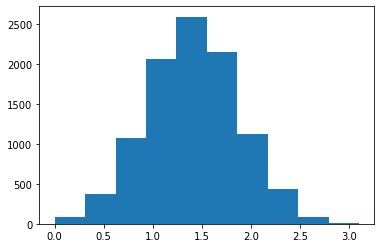

In [4]:
plt.hist(df["gravity"])
# df["gravity"].quantile([0.33, 0.5, 0.66])
df["gravity"] = pd.qcut(df["gravity"], 3, labels = ["-", "X̅", "+"])
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,GRANDE,PESADO,+,YES,YES,FRÍO,YES,50.5,NO
1,GRANDE,PESADO,+,NO,NO,FRÍO,NO,30.5,NO
2,GRANDE,PESADO,+,YES,YES,TEMPLADO,YES,12.3,YES
3,GRANDE,PESADO,+,YES,YES,TEMPLADO,NO,24.5,NO
4,PEQUEÑO,LIGERO,-,NO,NO,FRÍO,NO,32.7,NO
...,...,...,...,...,...,...,...,...,...
9995,MEDIANO,PESO MEDIO,X̅,NO,NO,TEMPLADO,NO,38.0,NO
9996,MEDIANO,PESO MEDIO,X̅,YES,YES,CALOR,NO,24.9,NO
9997,PEQUEÑO,LIGERO,-,NO,NO,CALOR,NO,50.1,NO
9998,MEDIANO,PESO MEDIO,X̅,NO,NO,CALOR,NO,49.3,NO


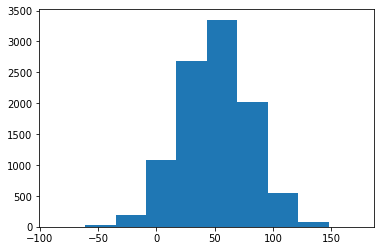

In [5]:
plt.hist(df["avg_temp (C)"])
# df["avg_temp (C)"].quantile([0.33, 0.5, 0.66])
df["avg_temp (C)"] = pd.qcut(df["avg_temp (C)"], 3, labels = ["FRÍO", "TEMPLADO", "CALOR"])
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,GRANDE,PESADO,+,YES,YES,FRÍO,YES,CORTO,NO
1,GRANDE,PESADO,+,NO,NO,FRÍO,NO,MEDIO,NO
2,GRANDE,PESADO,+,YES,YES,TEMPLADO,YES,LARGO,YES
3,GRANDE,PESADO,+,YES,YES,TEMPLADO,NO,LARGO,NO
4,PEQUEÑO,LIGERO,-,NO,NO,FRÍO,NO,MEDIO,NO
...,...,...,...,...,...,...,...,...,...
9995,MEDIANO,PESO MEDIO,X̅,NO,NO,TEMPLADO,NO,CORTO,NO
9996,MEDIANO,PESO MEDIO,X̅,YES,YES,CALOR,NO,LARGO,NO
9997,PEQUEÑO,LIGERO,-,NO,NO,CALOR,NO,CORTO,NO
9998,MEDIANO,PESO MEDIO,X̅,NO,NO,CALOR,NO,CORTO,NO


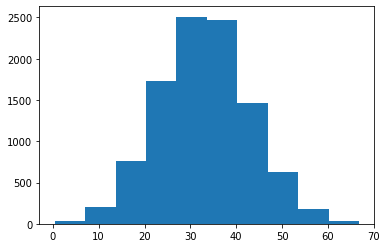

In [6]:
plt.hist(df["rotational_period (h)"])
# df["rotational_period (h)"].quantile([0.33, 0.5, 0.66])
df["rotational_period (h)"] = pd.qcut(df["rotational_period (h)"], 3, labels = ["LARGO", "MEDIO", "CORTO"])
df

## Grafo dirigido acíclico de la red bayesiana

Una vez categorizado, podemos comenzar con la red bayesiana en sí. Para ello, primero deberemos crear el grafo acíclico dirigido que la represente. 

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


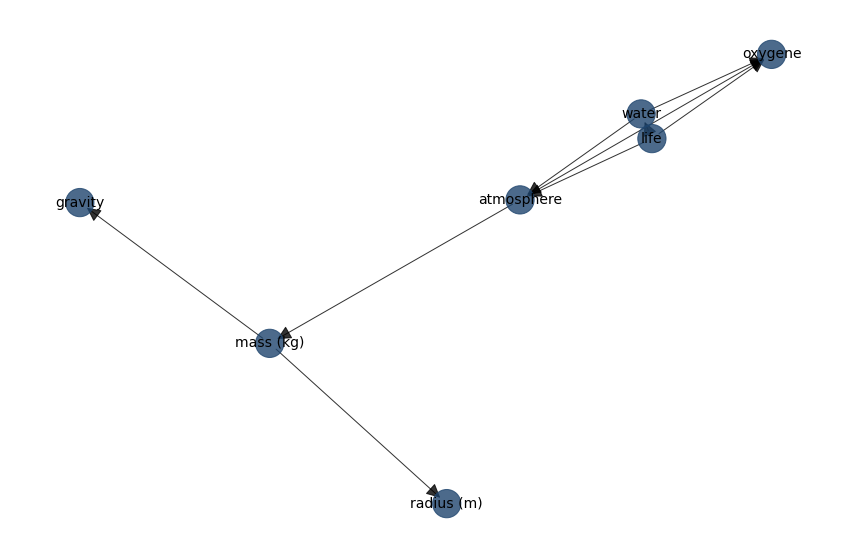

{'pos': {'radius (m)': array([ 0.02376079, -0.90749923]),
  'mass (kg)': array([-0.47024776, -0.51133358]),
  'gravity': array([-1.       , -0.1633305]),
  'atmosphere': array([ 0.22832559, -0.15667371]),
  'oxygene': array([0.93024678, 0.20303158]),
  'avg_temp (C)': array([-0.78419291,  0.63749535]),
  'water': array([0.56626935, 0.05584716]),
  'rotational_period (h)': array([-0.09048624,  0.84762449]),
  'life': array([ 0.59632441, -0.00516156])},
 'G': <networkx.classes.digraph.DiGraph at 0x1e011657dc0>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'rotational_period (h)': {'node_color': '#1f456

In [7]:
import bnlearn as bn

modelo = bn.structure_learning.fit(df)
bn.plot(modelo)

Vemos un principal *problema* en el grafo generado, y es que **por ningún lado se tiene en cuenta la temperatura**, característica vital para que haya vida, debido, principalmente, a que con alta temperatura no hay agua, cuesta respirar, etc.

Por tanto, **crearemos el grafo a nuestro criterio**, a mano, pero siguiendo un poco la línea que ha seguido en el generado ahora.

[bnlearn] >bayes DAG created.
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


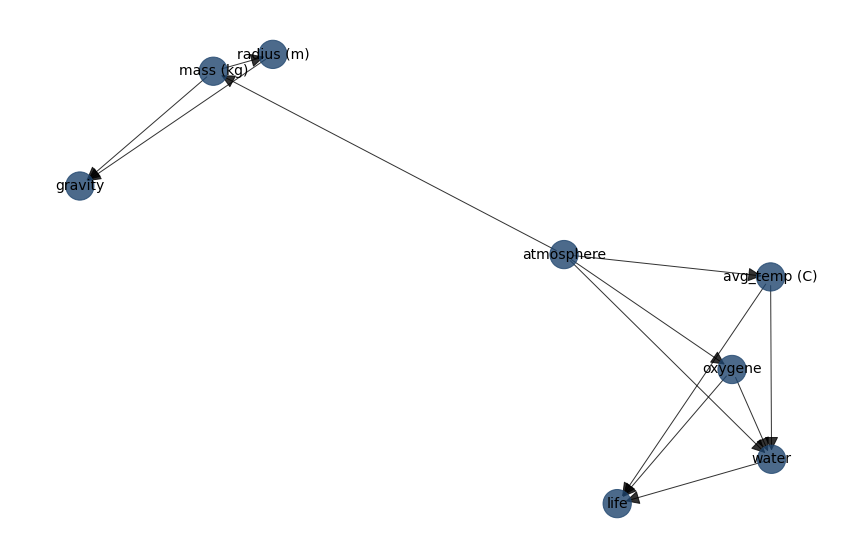

{'pos': {'radius (m)': array([-0.54351663,  0.5019265 ]),
  'gravity': array([-1.        ,  0.19822558]),
  'mass (kg)': array([-0.68425634,  0.46303312]),
  'atmosphere': array([0.14510278, 0.04007462]),
  'oxygene': array([ 0.5423905 , -0.22502889]),
  'water': array([ 0.63588854, -0.43224861]),
  'avg_temp (C)': array([ 0.63360614, -0.01148478]),
  'life': array([ 0.270785  , -0.53449755])},
 'G': <networkx.classes.digraph.DiGraph at 0x1e010f97790>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'life': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('radius (m)', 'gravity'): {'c

In [8]:
# parametros: radius (m), mass (kg), gravity, atmosphere, oxygene, avg_temp (C), water, rotational_period (h), life

DAG = bn.make_DAG([('radius (m)', 'gravity'), 
                   ('mass (kg)', 'radius (m)'),
                   ('mass (kg)', 'gravity'),
                   ('atmosphere', 'mass (kg)'), 
                   ('atmosphere', 'oxygene'),
                   ('atmosphere', 'water'),
                   ('atmosphere', 'avg_temp (C)'),
                   ('oxygene', 'water'),
                   ('oxygene', 'life'),
                   ('avg_temp (C)', 'water'),
                   ('avg_temp (C)', 'life'), 
                   ('water', 'life')])

bn.plot(DAG)

## Creación de las tablas de probabilidad condicionada

In [9]:
cpt_def = bn.parameter_learning.fit(DAG, df)

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['rotational_period (h)']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of radius (m):
+---------------------+----------------------+----------------------+-----------------------+
| mass (kg)           | mass (kg)(LIGERO)    | mass (kg)(PESADO)    | mass (kg)(PESO MEDIO) |
+---------------------+----------------------+----------------------+-----------------------+
| radius (m)(GRANDE)  | 0.030297521662727988 | 0.939388429251144    | 0.030305785374427973  |
+---------------------+----------------------+----------------------+-----------------------+
| radius (m)(MEDIANO) | 0.030297521662727988 | 0.030305785374427973 | 0.939388429251144     |
+---------------------+----------------------+----------------------+-----------------------+
| radius (m)(PEQUEÑO) | 0.939404956674544    | 0.030305785374427973 | 0.030305785374427973  |
+---------------------+----------------------+-------

Por ejemplo, para comprobar que se ha comprendido correctamente podemos leer una de las CPT (tablas de probabilidad condicionada). 

Si por ejemplo nos vamos a lo más simple, la tabla de probabilidad condicionada de la variable "life", podemos observar que parece ser que sabiendo que hay una temperatura media, hay oxíeno y hay agua, la probabilidad de albergar vida es de más del 75%, lo cual es bastante lógico conociendo, por ejemplo, las condiciones de nuestro planeta.

## Inferencia sobre la capacidad de albergar vida según características

Ahora podemos hacer inferencia sobre la vida, por ejemplo, en otros planetas sabiendo las probabilidades condicionadas.

In [10]:
inf1 = bn.inference.fit(cpt_def, variables=['life'], evidence={'gravity': 'X̅', 'radius (m)':'MEDIANO', 
                                                           'atmosphere':'YES', "water":'YES'})
print(inf1.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.300995 |
+----+--------+----------+
|  1 |      1 | 0.699005 |
+----+--------+----------+
   life         p
0     0  0.300995
1     1  0.699005


In [11]:
inf2 = bn.inference.fit(cpt_def, variables=['life'], evidence={'avg_temp (C)': 'CALOR', 'oxygene':'YES'})
print(inf2.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.691265 |
+----+--------+----------+
|  1 |      1 | 0.308735 |
+----+--------+----------+
   life         p
0     0  0.691265
1     1  0.308735


**0 = NO
1 = SÍ**